[View in Colaboratory](https://colab.research.google.com/github/davidkant/mai/blob/master/tutorial/8_2_Multilayer_Perceptron.ipynb)

# 8.2 Multilayer Perceptron
in the previous section, we saw that the complexity of patterns that a single layer percetron can distinguish is limited to those that are linearly separable. In this section we'll see if a mutlilayer perceptron can do any better.

# Setup
We'll be using the neural network library [`keras`](https://keras.io/) in addition to some of the other usual suspects.

In [1]:
# install external libraries
!pip install -q git+https://github.com/davidkant/mai#egg=mai;
!apt-get -q install ffmpeg

Reading package lists...
Building dependency tree...
Reading state information...
ffmpeg is already the newest version (7:3.4.4-0ubuntu0.18.04.1).
0 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.


In [2]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD
import numpy as np
import matplotlib.pyplot as plt
import mai.nn as nn

Using TensorFlow backend.


# Construct the neural network
This time we'll construct a network with one hidden layer.


In [0]:
# create an empty ANN
model = Sequential()

# input and hidden layer
model.add(Dense(units=4, input_dim=2, activation='relu'))

# add a hidden layers
model.add(Dense(units=2, activation='relu'))
  
# add the output layer
model.add(Dense(units=2, activation='softmax'))

# compile the model
model.compile(loss ='binary_crossentropy',
              optimizer=SGD(lr=0.03, decay=1e-6, momentum=0.9, nesterov=True),
              metrics=['accuracy'])


Call `model.summary()` for details.

In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 6         
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________


# Train and plot the neural network
We'll use the same training set.

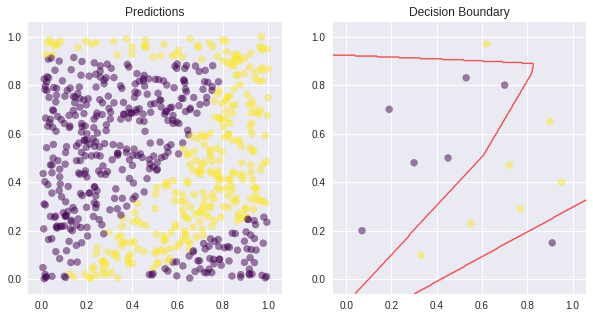

In [11]:
# training data
x_train, y_train = nn.training_data_platinum_records()

# create a new multilayer NN
model = nn.multiLayerPerceptron(num_neurons=8, num_hidden_layers=2, input_dim=2, output_dim=2)

# fit the NN
model.fit(x_train, y_train, epochs=400, batch_size=7, verbose=0)

# generate test data
x_test = np.random.random((700, 2))

# predict test data outputs
y_test = model.predict(x_test)

# plot it
nn.prediction_and_boundary_plot(model, x_test, y_test, x_train, y_train)

Let's animate that.

In [6]:
# training data
x_train, y_train = nn.training_data_platinum_records()

# create a new multilayer NN
model = nn.multiLayerPerceptron(num_neurons=8, num_hidden_layers=2, input_dim=2, output_dim=2)

# generate test data
x_test = np.random.random((700, 2))

# animate it
nn.prediction_and_boundary_animation(model, x_train, y_train, x_test, batch_size=7, frames=200, epochs_per_frame=2)

# The OR function
Let's try the OR function.

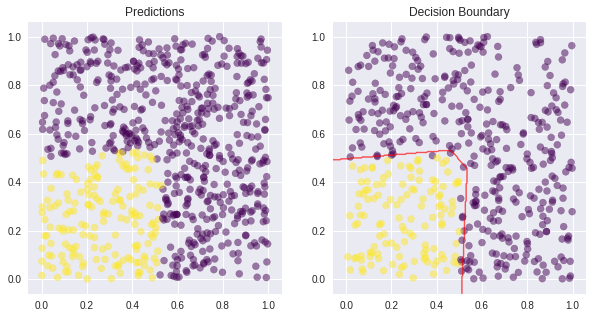

In [7]:
# training data
x_train, y_train = nn.generate_training_data(num_samples=500, input_dim=2, func=nn.OR)

# create a new multilayer NN
model = nn.multiLayerPerceptron(num_neurons=8, num_hidden_layers=2, input_dim=2, output_dim=2)

# fit the NN
model.fit(x_train, y_train, epochs=200, batch_size=40, verbose=0)

# generate test data
x_test = np.random.random((700, 2))

# predict test data outputs
y_test = model.predict(x_test)

# plot it
nn.prediction_and_boundary_plot(model, x_test, y_test, x_train, y_train)

Let's animate that.

In [8]:
# training data
x_train, y_train = nn.generate_training_data(num_samples=500, input_dim=2, func=nn.OR)

# create a new multilayer NN
model = nn.multiLayerPerceptron(num_neurons=8, num_hidden_layers=2, input_dim=2, output_dim=2)

# generate test data
x_test = np.random.random((700, 2))

# animate it
nn.prediction_and_boundary_animation(model, x_train, y_train, x_test, batch_size=40, frames=100, epochs_per_frame=2)

# The dreaded XOR...
I wonder what whill happen this time!

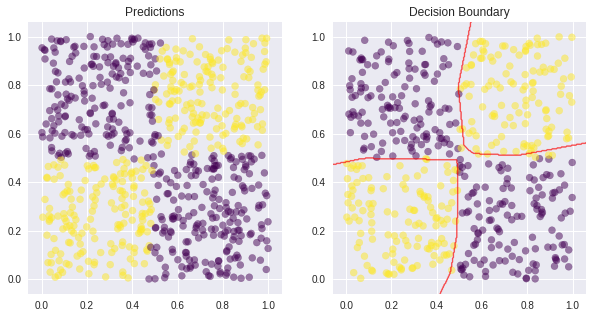

In [9]:
# training data
x_train, y_train = nn.generate_training_data(num_samples=500, input_dim=2, func=nn.XOR)

# create a new multilayer NN
model = nn.multiLayerPerceptron(num_neurons=8, num_hidden_layers=2, input_dim=2, output_dim=2)

# fit the NN
model.fit(x_train, y_train, epochs=200, batch_size=40, verbose=0)

# generate test data
x_test = np.random.random((700, 2))

# predict test data outputs
y_test = model.predict(x_test)

# plot it
nn.prediction_and_boundary_plot(model, x_test, y_test, x_train, y_train)

Let's animate that.

In [10]:
# training data
x_train, y_train = nn.generate_training_data(num_samples=500, input_dim=2, func=nn.XOR)

# create a new multilayer NN
model = nn.multiLayerPerceptron(num_neurons=8, num_hidden_layers=2, input_dim=2, output_dim=2)

# generate test data
x_test = np.random.random((700, 2))

# animate it
nn.prediction_and_boundary_animation(model, x_train, y_train, x_test, batch_size=40, frames=100, epochs_per_frame=2)